In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import torch
from torch import nn


In [2]:
data = load_breast_cancer()

x = data.data[:,(0,1)] # radius and texture
y = data.target

x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [3]:
#train the model
class breast_cancer(nn.Module):
    def __init__(self):
        super(breast_cancer, self).__init__()
        self.layer1 = nn.Linear(in_features=2,out_features=16)
        self.layer2 = nn.Linear(in_features=16,out_features=8)
        self.layer3 = nn.Linear(in_features=8,out_features=1)
        
    def forward(self, x):
        y_pred = torch.relu(self.layer1(x))
        y_pred = torch.relu(self.layer2(y_pred))
        y_pred = torch.sigmoid(self.layer3(y_pred))
        return y_pred


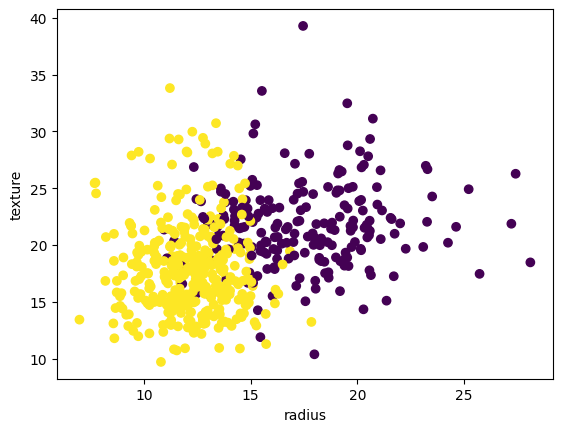

In [4]:
#plotting the data
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel('radius')
plt.ylabel('texture')
plt.show()

In [5]:
torch.manual_seed(42)
model = breast_cancer()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
lossfn = nn.BCELoss()
epoch_count = []
loss_values = []
test_loss_values = []
epochs = 1000
for epoch in range(epochs):
    model.train()
    y_pred = model(x_train)
    loss = lossfn(y_pred.squeeze(), y_train)
    loss_values.append(loss.detach().numpy())
    optimizer.zero_grad()

    loss.backward()
    optimizer.step()
        
        
    model.eval()
    with torch.inference_mode():
        test_preds = model(x_test)
        test_preds = test_preds.squeeze()
        test_loss = lossfn(test_preds, y_test)
        test_loss_values.append(test_loss)
        epoch_count.append(epoch)
        

    if epoch % 100 ==0 :
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        
test_preds = torch.round(test_preds)
accuracy = (test_preds == y_test).sum() / len(y_test) * 100
print(f"Accuracy: {accuracy}")


Epoch: 0 | Loss: 0.7697159647941589 | Test Loss: 0.77447909116745
Epoch: 100 | Loss: 0.6126002073287964 | Test Loss: 0.6034148931503296
Epoch: 200 | Loss: 0.5905821919441223 | Test Loss: 0.5705998539924622
Epoch: 300 | Loss: 0.5654587149620056 | Test Loss: 0.5422961711883545
Epoch: 400 | Loss: 0.5201178193092346 | Test Loss: 0.49288731813430786
Epoch: 500 | Loss: 0.43628281354904175 | Test Loss: 0.405338853597641
Epoch: 600 | Loss: 0.34381428360939026 | Test Loss: 0.30840906500816345
Epoch: 700 | Loss: 0.2895562946796417 | Test Loss: 0.2517133951187134
Epoch: 800 | Loss: 0.2652016580104828 | Test Loss: 0.22635199129581451
Epoch: 900 | Loss: 0.25504928827285767 | Test Loss: 0.2155698835849762
Accuracy: 91.22806549072266


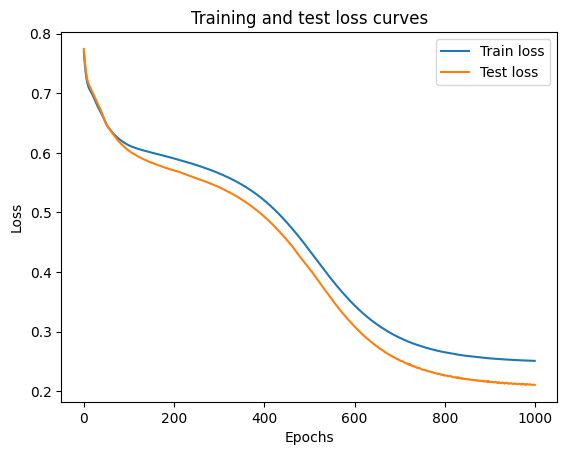

In [6]:
plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()